In [1]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit
from scipy import asarray as ar
from scipy import math
#import pylandau
import random

Populating the interactive namespace from numpy and matplotlib


# Importo il dataset

In [2]:
file = pd.read_csv(r'/Users/giulioquaglia/Downloads/Econofisica-main/dati_rndm_.0151.txt')
file.head()

,x,y,color,pen down?,x.1,y.1,color.1,pen down?.1,x.2,y.2,color.2,pen down?.2
0,0,1120,55,True,0,0,0,True,0,0,15,True
1,1,1033,55,True,1,26,0,True,1,61,15,True
2,2,716,55,True,2,85,0,True,2,319,15,True
3,3,602,55,True,3,143,0,True,3,375,15,True
4,4,601,55,True,4,201,0,True,4,318,15,True


In [3]:
df = file['y.2']
y = df.to_numpy()
y = y[210:]
x = ar(range(len(y)))
len(x)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.asarray is deprecated and will be removed in SciPy 2.0.0, use numpy.asarray instead
  after removing the cwd from sys.path.


731

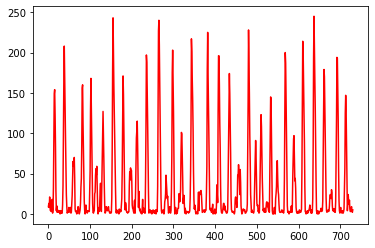

In [4]:
plt.plot(x, y, color='r')
#plt.errorbar(range(len(soglie)), soglie, yerr=err_soglie)
plt.show()

# Definizioni Utili

## Fit Utils

In [5]:
def chiquadronorm(oss, fit, sigma, ddof, aiuto=False, norm=True):
    'funzione che calcola il chiquadrato di una distribuzione osservata rispetto a una\
    forma funzionale nota'
    
    #prende liste monodimensionali come argomenti
    scarti = []
    scartiquadri = []
    scartiquadridivisi = []
    
    for i in range(len(oss)):
        scarti.append(oss[i]-fit[i])
        scartiquadri.append(scarti[i]*scarti[i])
        scartiquadridivisi.append(scartiquadri[i]/(sigma[i]*sigma[i]))
        
        if (aiuto==True):
            print('scarti= ', scarti[i])
            print('scartiquadri= ', scartiquadri[i])
            print('scartiquadridivisi= ', scartiquadridivisi[i])
            
    chiquadro=sum(scartiquadridivisi)
    chiquadroreg=chiquadro/ddof
    
    if(norm==True):
        return (chiquadroreg)
    else:
        return (chiquadro)

def cost_chiquadronorm(oss, fit, sigma, ddof, aiuto=False, norm=True):
    'funzione che calcola il chiquadrato di una distribuzione osservata rispetto a una\
    forma funzionale nota'
    
    #prende liste monodimensionali come argomenti
    scarti = []
    scartiquadri = []
    scartiquadridivisi = []
    
    for i in range(len(oss)):
        scarti.append(oss[i]-fit)
        scartiquadri.append(scarti[i]*scarti[i])
        scartiquadridivisi.append(scartiquadri[i]/(sigma[i]*sigma[i]))
        
        if (aiuto==True):
            print('scarti= ', scarti[i])
            print('scartiquadri= ', scartiquadri[i])
            print('scartiquadridivisi= ', scartiquadridivisi[i])
            
    chiquadro=sum(scartiquadridivisi)
    chiquadroreg=chiquadro/ddof
    
    if(norm==True):
        return (chiquadroreg)
    else:
        return (chiquadro)

    
def media_pesata(x, sigma):
    numeratore = 0
    denominatore = 0
    for i in range(len(x)):
        numeratore += x[i]/(sigma[i]**2)
        denominatore += 1/(sigma[i]**2)
    return numeratore/denominatore

def costante(x,q):
    return q

def retta(x,m,q):
    return m*x +q

def gauss(x,a,x0,sigma,baseline):
    'Ritorna array gaussiano a partire da lista x secondo i parametri a,x0,sigma'
    return (baseline + a*exp(-(x-x0)**2/(2*sigma*sigma)))


def lore(x, a, x0, y0, baseline):
    'Ritorna array lorentziano a partire da lista x secondo i parametri a,x0,yo'
    return (baseline + a*(y0/(((x - x0)**2) + (y0**2))))

def fattoriale(x):
    temp_list = []

    for ics in x:
        f=1
        for i in range(1,ics+1):
            f*=i
        temp_list.append(f)
    return(temp_list)

def poisson(x, a, media, baseline):
    result = baseline + a*(media**x)*np.exp(-media)/fattoriale(x)
    return(result)

def landau(x, mpv, eta, A, baseline):
    x=double(x)
    'Ritorna array landauiano a partire da lista x secondo i parametri suoi'
    return (baseline + double(pylandau.landau(x, mpv=mpv, eta=eta, A=A)))

## Selecting Spikes

In [6]:
def isola_spikes (y, datiesterni):
    '''
    Dati i dati sugli attivi, ritorna due dizionari: 
    {num_rivolta: [valori attivi]}
    {num_rivolta: [tick corrispondenti]}
    '''
    rivolte_diz = {}
    tick_rivolte_diz = {}
    temp_rivolta_list = []
    temp_tick_list = []
    rivolte_counter = 0
    cerarivolta = False
    
    for i in range(len(y)):
        
        ##aggiustato a 12 per non avere rivoltini
        if y[i] > 12:
            temp_rivolta_list.append(y[i])
            temp_tick_list.append(i)
            if cerarivolta == False:
                rivolte_counter += 1
                cerarivolta = True
        else:
            if cerarivolta == True:
                lunghezza=len(temp_rivolta_list)
                if rivolte_counter > 1:
                    if datiesterni == 1:
                        temp_rivolta_list.insert(0, y[i-lunghezza-1])
                        temp_tick_list.insert(0, i-lunghezza-1)
                    if datiesterni == 2:
                        temp_rivolta_list.insert(0, y[i-lunghezza-1])
                        temp_rivolta_list.insert(0, y[i-lunghezza-2])
                        temp_tick_list.insert(0, i-lunghezza-1)
                        temp_tick_list.insert(0, i-lunghezza-2)
                    if datiesterni == 3:
                        temp_rivolta_list.insert(0, y[i-lunghezza-1])
                        temp_rivolta_list.insert(0, y[i-lunghezza-2])
                        temp_rivolta_list.insert(0, y[i-lunghezza-3])
                        temp_tick_list.insert(0, i-lunghezza-1)
                        temp_tick_list.insert(0, i-lunghezza-2)
                        temp_tick_list.insert(0, i-lunghezza-3)
                else:
                    if datiesterni == 1:
                        temp_rivolta_list.insert(0, 0)
                        temp_tick_list.insert(0, i-lunghezza-1)
                    if datiesterni == 2:
                        temp_rivolta_list.insert(0, 0)
                        temp_rivolta_list.insert(0, 0)
                        temp_tick_list.insert(0, i-lunghezza-1)
                        temp_tick_list.insert(0, i-lunghezza-2)
                    if datiesterni == 3:
                        temp_rivolta_list.insert(0, 0)
                        temp_rivolta_list.insert(0, 0)
                        temp_rivolta_list.insert(0, 0)
                        temp_tick_list.insert(0, i-lunghezza-1)
                        temp_tick_list.insert(0, i-lunghezza-2)
                        temp_tick_list.insert(0, i-lunghezza-3)
                    
                if datiesterni == 1:
                        temp_rivolta_list.append(y[i])
                        temp_tick_list.append(i)
                if datiesterni == 2:
                        temp_rivolta_list.append(y[i])
                        temp_rivolta_list.append(y[i+1])
                        temp_tick_list.append(i)
                        temp_tick_list.append(i+1)
                if datiesterni == 3:
                        temp_rivolta_list.append(y[i])
                        temp_rivolta_list.append(y[i+1])
                        temp_rivolta_list.append(y[i+2])
                        temp_tick_list.append(i)
                        temp_tick_list.append(i+1)
                        temp_tick_list.append(i+2)
                
                rivolte_diz[str(rivolte_counter)+'_spike'] = temp_rivolta_list
                tick_rivolte_diz[str(rivolte_counter)+'_spike'] = temp_tick_list
                temp_rivolta_list = []
                temp_tick_list = []
                cerarivolta = False
                
    return rivolte_diz, tick_rivolte_diz

# Analisi - rndm 0.151%

## Creo dizionario degli spikes

In [7]:
spikes_dict, tick_spikes_dict = isola_spikes(y, 3)

# Rivolte  
**HP: sono funzioni gaussiane**  
Usiamo il valore di soglia trovato nel caso non random, cambia il meccanismo di attivazione del singolo agente ma non la descrizione della rivolta.  
Selezioniamo tutte le rivolte tali per cui max#attivi+errore_attivi >= soglia-5err_soglia, queste apparterranno alla stessa categoria di rivolte trovate nel caso non rndm.  
Salvo in rivoltini_dict quelle che non vengono incluse prima per vedere se si viene a creare una nuova popolazione dovuta dalla randomizzazione (che differisce invece dalle rivolte, dovute alla clusterizzazione degli agenti)

In [8]:
soglia = 128.1241472701187
err_soglia = 11.6007119219633

In [9]:
## Seleziono le rivolte secondo la regola:
###if soglia-5*errore_soglia < y + errore_y --> rivolta
###altrimenti salvo in rivoltini_dict
rivolte_dict = {}
tick_rivolte_dict = {}
rivoltini_dict = {}
tick_rivoltini_dict = {}
rivolte_counter = 0
rivoltini_counter = 0
for spike in spikes_dict:
    y = spikes_dict[spike]
    x = tick_spikes_dict[spike]
    if np.max(y)+np.sqrt(np.max(y)) >= soglia-5*err_soglia:
        rivolte_counter += 1
        rivolte_dict[str(rivolte_counter)+'_rivolta']=y
        tick_rivolte_dict[str(rivolte_counter)+'_rivolta']=x
    else:
        rivoltini_counter += 1 
        rivoltini_dict[str(rivoltini_counter)+'_rivoltini']=y
        tick_rivoltini_dict[str(rivoltini_counter)+'_rivoltini']=x

In [10]:
print(len(spikes_dict), len(rivolte_dict), len(rivoltini_dict))

51 31 20


In [11]:
print(soglia-5*err_soglia,'\n')
for risvoltino in rivoltini_dict:
    print(max(rivoltini_dict[risvoltino])+np.sqrt(max(rivoltini_dict[risvoltino])))
    


70.12058766030219 

25.58257569495584
25.58257569495584
25.58257569495584
37.65685424949238
66.68114574786861
67.74596669241484
64.54983443527075
68.81024967590665
22.242640687119284
54.92820323027551
32.19615242270663
34.3851648071345
16.605551275463988
54.92820323027551
68.81024967590665
18.872983346207416
18.872983346207416
35.47722557505166
46.324555320336756
28.898979485566358


In [12]:
for risvoltino in rivolte_dict:
    print(max(rivolte_dict[risvoltino])+np.sqrt(max(rivolte_dict[risvoltino])))
    

166.40967364599086
222.42220510185595
78.36660026534075
172.6491106406735
180.9614813968157
76.24621125123532
138.26942766958464
258.5884572681199
184.076696830622
125.72380529476361
94.21954445729288
211.0356688476182
255.49193338482968
217.247806848775
111.04987562112089
231.73091986265624
240.0
210.0
187.1909059582729
243.0996688705415
100.53939201416945
134.09053650640942
157.04159457879229
74.12403840463597
214.14213562373095
106.8488578017961
228.6287388383278
260.6524758424985
192.37908816025964
207.92838827718413
159.12435565298213


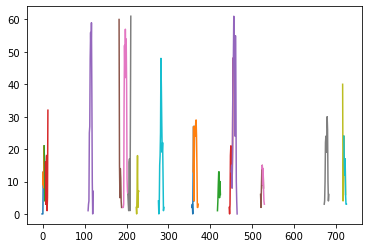

In [13]:
for risvoltino in rivoltini_dict:
    plt.plot(tick_rivoltini_dict[risvoltino],rivoltini_dict[risvoltino])

In [14]:
##calcolo soglie delle rivolte come f(media-sigma) e errore come f(media-1.2*sigma)-f(media-0.8*sigma)
soglie = []
err_soglie = []
for i, rivolta in enumerate(rivolte_dict.keys()):
    if rivolta != '11_rivolta':
        y = rivolte_dict[rivolta]
        x = range(len(y))
        ##computo errore come radice dei conteggi
        sigma_gauss = np.where(np.sqrt(y)==0,1,np.sqrt(y))
    
        gauss_params,gauss_cov = curve_fit(gauss,x,y,p0=[200.,3.,2.5,0],sigma=sigma_gauss)
        gauss_red_chisq = chiquadronorm(y, gauss(x,*gauss_params), sigma_gauss, len(y)-len(gauss_params), norm=True)
        soglia = gauss(gauss_params[1] - gauss_params[2], *gauss_params)
        errore = gauss(gauss_params[1] - 1.2*gauss_params[2], *gauss_params) - gauss(gauss_params[1] - 0.8*gauss_params[2], *gauss_params)
        soglie.append(soglia)
        err_soglie.append(np.abs(errore))
#soglie.pop(10)
#err_soglie.pop(10)
print(soglie)

[102.40839326182257, 117.57022589252946, 45.74063583425682, 90.43759031720619, 97.45048769936503, 26.879534401071556, 75.52890762628367, 133.41724909873915, 104.15020833020009, 77.25554376494804, 126.73575818185252, 152.66641843035208, 129.00485802983962, 63.37760187111679, 126.77576098629808, 128.8256870727921, 122.18941374100636, 106.22033041021754, 127.98271855004121, 55.241276994828745, 74.56071538854434, 98.29646093619091, 37.036516770104036, 123.58465768036565, 54.62904578125329, 129.75217180294504, 142.37593829179832, 112.46155232347434, 125.41954442194958, 94.65095023149784]


In [15]:
##calcolo soglini delle rivoltine come f(media-sigma) e errore come f(media-1.2*sigma)-f(media-0.8*sigma)
soglini = []
err_soglini = []
for i, rivolta in enumerate(rivoltini_dict.keys()):
    if rivolta != '14_rivoltini' and rivolta != '9_rivoltini' and rivolta != '6_rivoltini' and rivolta != '13_rivoltini' and rivolta != '11_rivoltini' and rivolta != '8_rivoltini':
        y = rivoltini_dict[rivolta]
        x = range(len(y))
        ##computo errore come radice dei conteggi
        sigma_gauss = np.where(np.sqrt(y)==0,1,np.sqrt(y))
    
        gauss_params,gauss_cov = curve_fit(gauss,x,y,p0=[35.,7.,3.,5.],sigma=sigma_gauss, **{'maxfev':1000})
        gauss_red_chisq = chiquadronorm(y, gauss(x,*gauss_params), sigma_gauss, len(y)-len(gauss_params), norm=True)
        soglia = gauss(gauss_params[1] - gauss_params[2], *gauss_params)
        errore = gauss(gauss_params[1] - 1.2*gauss_params[2], *gauss_params) - gauss(gauss_params[1] - 0.8*gauss_params[2], *gauss_params)
        soglini.append(soglia)
        err_soglini.append(np.abs(errore))
    #print('amplitude:', gauss_params[0])
    #print('mean:', gauss_params[1])
    #print('sigma:', gauss_params[2])
    #print('baseline: ', gauss_params[3])
    #print('errore: ', sigma_gauss)
print(soglini)
len(soglini)

[10.134668036608026, 4.6187161891940045, 30.005533920950658, 32.19338331759928, 37.11691679201021, 35.871801061029096, 23.676290412068454, 20.094785430833987, 29.51903095103918, 8.970700202203277, 6.576041330539982, 15.995439637122882, 18.259385620809255, 11.643297961219982]


14

## Metodo grafico  
Plotto le rivolte con relativi errori in funzione dell'ordine della rivolta,  
se il chiquadro ridotto del fit di questi valori con una costante è minore di uno, allora posso dire che gli eventi considerati sono statisticamente indipendenti e appartenenti alla stessa distribuzione

### Rivolte-Provo con costante

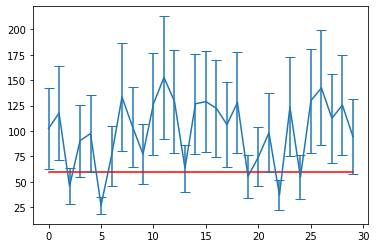

ReducedChiSquared: 1.8154474468456105


In [16]:
popt, pcov = curve_fit(costante, range(len(soglie)), soglie, sigma=err_soglie)
cost_red_chisq = cost_chiquadronorm(soglie, costante(range(len(soglie)),*popt), err_soglie, len(soglie)-len(popt), norm=True)
plt.plot(range(len(soglie)), [costante(range(len(soglie)),*popt) for k in range(len(soglie))], color='r')
plt.errorbar(range(len(soglie)), soglie, yerr=err_soglie,solid_capstyle='projecting',capsize=5)
plt.show()
print('ReducedChiSquared:', cost_red_chisq)

In [17]:
popt ,np.sqrt(pcov)

(array([59.35275918]), array([[6.54651538]]))

Gli eventi selezionati come rivolte hanno valori di soglia che, al netto degli errori considerati, sono considerabili come appartenenti a alla stessa distribuzione statistica.  
Rispetto al caso non random vedo però che il valore della costante (media pesata soglie) sembra essere calato

### Rivoltini-Provo con costante  
oss, sono proprio sicuro che fittino con una gaussiana? non dovrei provare altre forme funzionali?

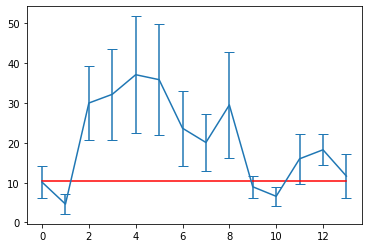

ReducedChiSquared: 2.610602751203444


In [18]:
popt, pcov = curve_fit(costante, range(len(soglini)), soglini, sigma=err_soglini)
cost_red_chisq = cost_chiquadronorm(soglini, costante(range(len(soglini)),*popt), err_soglini, len(soglini)-len(popt), norm=True)
plt.plot(range(len(soglini)), [costante(range(len(soglini)),*popt) for k in range(len(soglini))], color='r')
plt.errorbar(range(len(soglini)), soglini, yerr=err_soglini,solid_capstyle='projecting',capsize=5)
plt.show()
print('ReducedChiSquared:', cost_red_chisq)

I rivoltini invece, hanno un chiquadro ridotto superiore a uno.  
Non sembrerebbe si tratti della stessa popolazione statistica, ma probabilmente questo è dovuto ai piccoli errori sui valori di soglia più piccoli

# Metriche

Tutte le metriche vengono ricavate dal calcolo dei parametri derivanti dalla procedura di fit:
- Durata = 6sigma della rivolta considerata
- Tempo attesa = (media[rivolta_i+1] - 3sigma[rivolta_i+1]) - (media[rivolta_i] + 3sigma[rivolta_i])
- Ampiezza = parametro del fit
Gli errori vengono calcolati dalla propagazione degli errori sui parametri del fit

In [19]:
## For loop che mi serve a trovare ampiezza, media e deviazione standard di ognuna delle rivolte,
###salvo i parametri del fit per ognuna delle rivolte
gauss_params_dict = {}
gauss_err_params_dict = {}
for rivolte in rivolte_dict:

    temp_list = []
    temp_err_list = []
    y = rivolte_dict[rivolte]
    x = tick_rivolte_dict[rivolte]
    
    err_y = np.where(np.sqrt(y)==0,1,np.sqrt(y))
    gauss_params,gauss_cov = curve_fit(gauss,x,y,p0=[200,((x[-1]-x[0])/2)+x[0],4.,0.],sigma=err_y)
    temp_list.append(gauss_params[0])
    temp_list.append(gauss_params[1])
    temp_list.append(gauss_params[2])
    temp_list.append(gauss_params[3])
    temp_err_list.append(np.sqrt(np.abs(gauss_cov[0][0])))
    temp_err_list.append(np.sqrt(np.abs(gauss_cov[1][1])))
    temp_err_list.append(np.sqrt(np.abs(gauss_cov[2][2])))
    temp_err_list.append(np.sqrt(np.abs(gauss_cov[3][3])))
    gauss_params_dict[rivolte] = temp_list
    gauss_err_params_dict[rivolte] = temp_err_list
    
    

## Durata

In [20]:
## calcolo la durata delle singole rivolte come 6 per la sigma della rivolta (hp:gaussiane)
###e errori su singole durate propagando gli errori sulla sigma (6*err_assoluto sigma)
durate_list = [gauss_params_dict[rivolte][2]*6 for rivolte in rivolte_dict]
err_durate_list = [gauss_err_params_dict[rivolte][2]*6 for rivolte in rivolte_dict]
durate_list = np.abs(durate_list)
err_durate_list = np.abs(err_durate_list)
durate_list = np.delete(durate_list,10)
err_durate_list = np.delete(err_durate_list,10)

## calcolo media pesata e errore su media
media_pesata_durate = media_pesata(durate_list, err_durate_list)
err_media_pesata_durate = np.sqrt(np.sum((durate_list - media_pesata_durate)**2)/(len(durate_list)*(len(durate_list)-1)))

In [59]:
durate_list

array([ 9.28125391, 12.07750162, 11.7942002 , 11.92808896,  9.43914184,
        1.50221297,  9.87639216, 11.73735838,  9.45893048,  9.56284236,
        9.541715  , 11.04568925,  9.60527505, 10.6153491 , 12.19912092,
       10.13738494, 10.44153327, 10.86949524, 10.73722231,  9.42831317,
       10.29932703,  8.05463549, 11.68123228,  9.67697016, 12.42321004,
       10.76460583, 11.3542615 , 11.14302743, 10.64515386,  9.41992921])

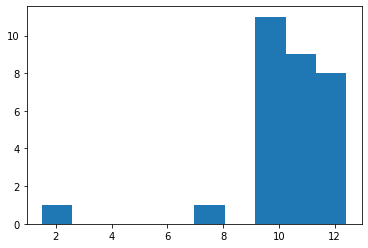

In [21]:
plt.hist(durate_list, bins=10)
plt.show()

In [22]:
print(media_pesata_durate,err_media_pesata_durate)

10.356454317537374 0.3595792510960507


## Tempi Attesa

In [23]:
## calcolo liste dei tick di inizio e fine rivolte con relativi errori 
###trovati con propagazione degli errori dagli errori dei parametri del fit
###(start = media-3sigma --> err_start = sqrt(err_media**2 + (3err_sigma)**2)
start_tick_list = []
end_tick_list = []
err_start_tick_list = []
err_end_tick_list = []

for rivolte in gauss_params_dict:
    media = gauss_params_dict[rivolte][1]
    sigma = np.abs(gauss_params_dict[rivolte][2])
    err_media = gauss_err_params_dict[rivolte][1]
    err_sigma = gauss_err_params_dict[rivolte][2]
    start_tick_list.append(media - 3*sigma)
    end_tick_list.append(media + 3*sigma)
    err_start_tick_list.append(np.sqrt(err_media**2 + (3*err_sigma)**2))
    err_end_tick_list.append(np.sqrt(err_media**2 + (3*err_sigma)**2))

In [24]:
## Calcolo tempi di attesa dalle liste dei tick di inizio e fine rivolte e relativi errori
###calcolati con la propagazione dagli errori dei tick di inizio e fine rivolte
###(tempo_attesa = start[i+1]-end[i] --> err_tempo_attesa = err_start[i+1] + err_end[i])
tempi_attesa_list = []
err_tempi_attesa_list = []
for i in range(len(end_tick_list)-1):
    tempi_attesa_list.append(start_tick_list[i+1] - end_tick_list[i])
    err_tempi_attesa_list.append(err_start_tick_list[i+1] + err_end_tick_list[i])

In [25]:
tempi_attesa_list = np.delete(tempi_attesa_list,10)
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,10)

In [26]:
tempi_attesa_list = np.delete(tempi_attesa_list,5)
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,5)

In [27]:
tempi_attesa_list = np.delete(tempi_attesa_list,8)
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,8)

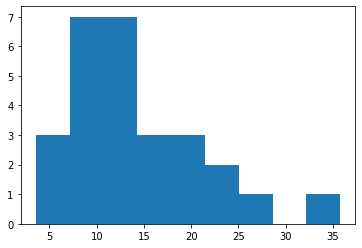

In [28]:
plt.hist(tempi_attesa_list, bins=9)
plt.show()


In [29]:
media_pesata_tempi_attesa = media_pesata(tempi_attesa_list, err_tempi_attesa_list)
err_media_pesata_tempi_attesa = np.sqrt(np.sum((tempi_attesa_list-media_pesata_tempi_attesa)**2)/((len(tempi_attesa_list)-1)*len(tempi_attesa_list)))
print('Media pesata e errore tempi attesa:',media_pesata_tempi_attesa,err_media_pesata_tempi_attesa)

Media pesata e errore tempi attesa: 15.269944733717509 1.3716788599715126


## Ampiezza

In [30]:
## Calcolo ampiezze per ogni rivolta e errore da propagazione errori del fit
ampiezze_list = [gauss_params_dict[rivolte][0] for rivolte in rivolte_dict]
err_ampiezze_list = [gauss_err_params_dict[rivolte][0] for rivolte in rivolte_dict]
ampiezze_list = np.abs(ampiezze_list)
err_ampiezze_list = np.abs(err_ampiezze_list)
ampiezze_list = np.delete(ampiezze_list,10)
err_ampiezze_listt = np.delete(err_ampiezze_list,10)

## Calcolo media pesata e errore su media
media_pesata_ampiezze = media_pesata(ampiezze_list, err_ampiezze_list)
err_media_pesata_ampiezze = np.sqrt(np.sum((ampiezze_list - media_pesata_ampiezze)**2)/(len(ampiezze_list)*(len(ampiezze_list)-1)))

In [31]:
ampiezze_list

array([166.8170585 , 194.31477331,  74.05343727, 148.39606234,
       158.43786603, 314.182613  , 122.51882942, 219.79931776,
       163.74947338, 123.97468594, 209.70331891, 251.02533692,
       212.5904748 ,  95.98171422, 206.05345378, 207.39377968,
       198.70194839, 174.16344658, 207.30995308,  88.33304804,
       121.1475118 , 161.48692588,  60.26957144, 203.16690052,
        88.88317345, 214.25457967, 235.70887995, 182.81563607,
       205.38415565, 153.02369304])

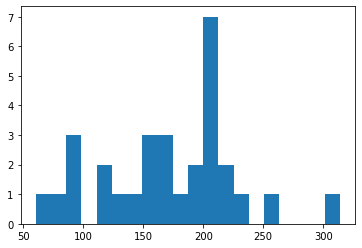

In [32]:
plt.hist(ampiezze_list, bins=20)
plt.show()

In [33]:
print(media_pesata_ampiezze,err_media_pesata_ampiezze)

161.5211632589078 10.641449749097227


L'ampiezza sembra diminuire, anche se è compatibile al caso random precedente

abbozzo di discorso:  
'compaiono' queste nuove rivoltine che nel caso non random invece non comparivano, le loro soglie non fittano a costante perchè gli errori sulle soglie più piccole sono molto piccoli. Inolte rispetto al caso non rndm il valore della costante alla quale fittano le soglie delle rivolte sembra essere calato. Mi aspetto che aumentando la randomizzazione aumentino i rivoltini e cali ancora il valore della costante alla quale fittano le soglie delle rivolte.  
IN REALTà:
ho provato a dare un occhio al caso non rndm lungo sulla quale calcolo le metriche, se seleziono le rivolte come ho fatto qua (soglia-5err_rivolta <= max_attivi+sqrt(max_attivi)) rimangono comunque rivoltini, inoltre è tutto da verificare che le soglie fittino a costante anche in questo caso. Per essere come dico qua dovrei avere che tutti gli spike che non vengono selezionati sono in qualche modo errori nella selezione degli spike. Posso darci un occhio, se no me ne sbatto e dico lo stesso il discorso sopra cosi da arrivare a una conclusione per sto lavoro di merda. Calcolo le metriche come ho fatto prima pure per questo caso e confronto al caso precedente confrontando unicamente i valori di media, mediana e (forse) moda

In [98]:
## For loop che mi serve a trovare ampiezza, media e deviazione standard di ognuna delle rivolte,
###salvo i parametri del fit per ognuna delle rivolte
gauss_params_dict = {}
gauss_err_params_dict = {}
for rivolte in spikes_dict:

    temp_list = []
    temp_err_list = []
    y = spikes_dict[rivolte]
    x = tick_spikes_dict[rivolte]
    
    err_y = np.where(np.sqrt(y)==0,1,np.sqrt(y))
    gauss_params,gauss_cov = curve_fit(gauss,x,y,p0=[200,((x[-1]-x[0])/2)+x[0],4.,0.],sigma=err_y,**{'maxfev':100000})
    temp_list.append(gauss_params[0])
    temp_list.append(gauss_params[1])
    temp_list.append(gauss_params[2])
    temp_list.append(gauss_params[3])
    temp_err_list.append(np.sqrt(np.abs(gauss_cov[0][0])))
    temp_err_list.append(np.sqrt(np.abs(gauss_cov[1][1])))
    temp_err_list.append(np.sqrt(np.abs(gauss_cov[2][2])))
    temp_err_list.append(np.sqrt(np.abs(gauss_cov[3][3])))
    gauss_params_dict[rivolte] = temp_list
    gauss_err_params_dict[rivolte] = temp_err_list
    

In [99]:
## calcolo liste dei tick di inizio e fine rivolte con relativi errori 
###trovati con propagazione degli errori dagli errori dei parametri del fit
###(start = media-3sigma --> err_start = sqrt(err_media**2 + (3err_sigma)**2)
start_tick_list = []
end_tick_list = []
err_start_tick_list = []
err_end_tick_list = []

for rivolte in gauss_params_dict:
    media = gauss_params_dict[rivolte][1]
    sigma = np.abs(gauss_params_dict[rivolte][2])
    err_media = gauss_err_params_dict[rivolte][1]
    err_sigma = gauss_err_params_dict[rivolte][2]
    start_tick_list.append(media - 3*sigma)
    end_tick_list.append(media + 3*sigma)
    err_start_tick_list.append(np.sqrt(err_media**2 + (3*err_sigma)**2))
    err_end_tick_list.append(np.sqrt(err_media**2 + (3*err_sigma)**2))

In [100]:
## Calcolo tempi di attesa dalle liste dei tick di inizio e fine rivolte e relativi errori
###calcolati con la propagazione dagli errori dei tick di inizio e fine rivolte
###(tempo_attesa = start[i+1]-end[i] --> err_tempo_attesa = err_start[i+1] + err_end[i])
tempi_attesa_list = []
err_tempi_attesa_list = []
for i in range(len(end_tick_list)-1):
    tempi_attesa_list.append(start_tick_list[i+1] - end_tick_list[i])
    err_tempi_attesa_list.append(err_start_tick_list[i+1] + err_end_tick_list[i])

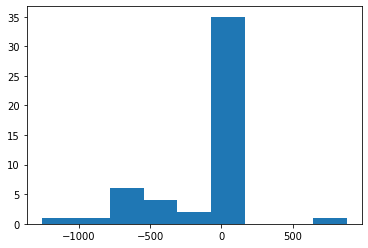

In [104]:
plt.hist(tempi_attesa_list, bins=9)
plt.show()



In [107]:
n=38
for i in range(n-1,-1,-1):
    if tempi_attesa_list[i]<0:
        err_tempi_attesa_list.remove(err_tempi_attesa_list[i])

In [108]:
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,21)
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,31)
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,30)

In [109]:
n=38
for i in range(n-1,-1,-1):
    if tempi_attesa_list[i]<0:
        tempi_attesa_list.remove(tempi_attesa_list[i])

In [112]:
tempi_attesa_list = np.delete(tempi_attesa_list,21)
tempi_attesa_list = np.delete(tempi_attesa_list,31)
tempi_attesa_list = np.delete(tempi_attesa_list,30)

array([ 1.30230594e+01,  9.56889221e+00,  9.79696822e+00,  9.75612766e+00,
        1.55800242e+00,  7.78899381e+00,  1.42627662e+01,  1.27677441e+01,
        1.59261158e+02,  1.91062965e+01,  4.89626464e+00,  4.10978516e+00,
        1.11243816e+01,  1.34287043e+01,  6.89004540e+00,  1.65308940e+01,
        8.75347459e+02,  9.04210464e+00,  6.02331902e+00,  3.55443106e+00,
        3.25271026e+00,  5.53486182e+00,  9.31827691e+00,  9.04221972e+00,
        1.05483344e+01,  1.56798552e+01,  1.27041800e+01,  2.38580243e+00,
        2.24456470e+00,  1.01424262e+01, -6.19604252e-01, -2.00695428e+01])

In [117]:
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,-14)
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,-22)
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,5)

array([6.89351072e-01, 9.84887210e-01, 9.39753319e-01, 5.08315069e-01,
       9.28279875e-01, 1.05406118e+05, 1.06711370e+00, 7.09838050e-01,
       5.12671445e+04, 7.86230594e-01, 1.31344042e+00, 1.25263113e+00,
       9.18998152e-01, 9.65463683e-01, 1.97683123e+00, 8.09747669e-01,
       2.56678099e+00, 6.76522515e-01, 6.80089576e-01, 4.04178325e+00,
       1.07215186e+00, 1.05915444e+00, 9.84634164e-01, 1.02796291e+00,
       6.84567868e-01, 6.10724884e-01, 2.30584291e+00, 2.28651351e+00,
       6.30284079e-01])

In [120]:
tempi_attesa_list = np.delete(tempi_attesa_list,-14)
tempi_attesa_list = np.delete(tempi_attesa_list,-22)
tempi_attesa_list = np.delete(tempi_attesa_list,5)


In [121]:
err_tempi_attesa_list = np.delete(err_tempi_attesa_list,6)
tempi_attesa_list = np.delete(tempi_attesa_list,6)

In [122]:
media_pesata_tempi_attesa = media_pesata(tempi_attesa_list, err_tempi_attesa_list)
err_media_pesata_tempi_attesa = np.sqrt(np.sum((tempi_attesa_list-media_pesata_tempi_attesa)**2)/((len(tempi_attesa_list)-1)*len(tempi_attesa_list)))
print('Media pesata e errore tempi attesa:',media_pesata_tempi_attesa,err_media_pesata_tempi_attesa)

Media pesata e errore tempi attesa: 10.288943685572518 0.9675389325916739
